In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

import umap.umap_ as umap
import umap.plot

/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [2]:
(x_train, label_train), (x_test, label_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

### Simplest Autoencoder

Single Dense layer for the representation of the information in the latent space

In [80]:
def visualize_data(x_test, decoded_imgs):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        #original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i])
        plt.title("original")
        plt.gray()

        #reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        plt.title("reconstructed")
        plt.gray()
    plt.show()

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0172 - val_loss: 0.0053
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.001

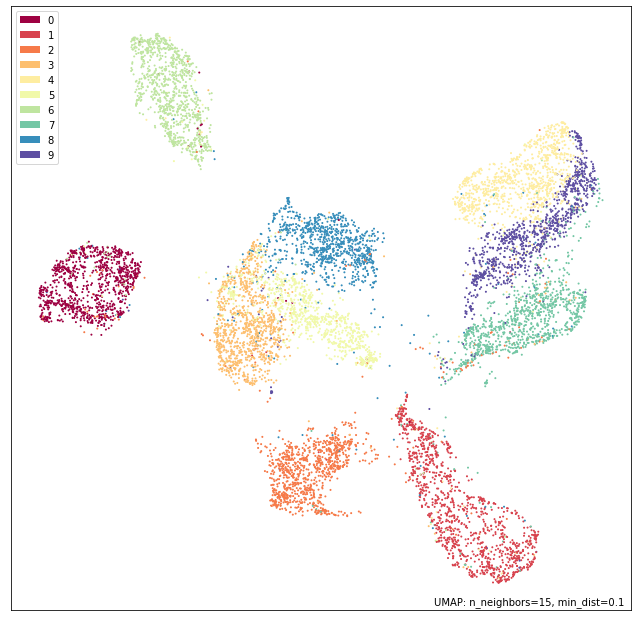

In [83]:
#Latent space dimensionality of 128

latent_dim = 128

class Autoencoder_v0(Model):
    def __init__(self, latent_dim):
        super(Autoencoder_v0, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Flatten(),
          layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(784, activation='sigmoid'),
          layers.Reshape((28, 28))
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder_v0 = Autoencoder_v0(latent_dim)
autoencoder_v0.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder_v0.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = autoencoder_v0.encoder(x_test).numpy()
decoded_imgs = autoencoder_v0.decoder(encoded_imgs).numpy()

mapper = umap.UMAP().fit(encoded_imgs)
umap.plot.points(mapper, labels=label_test);

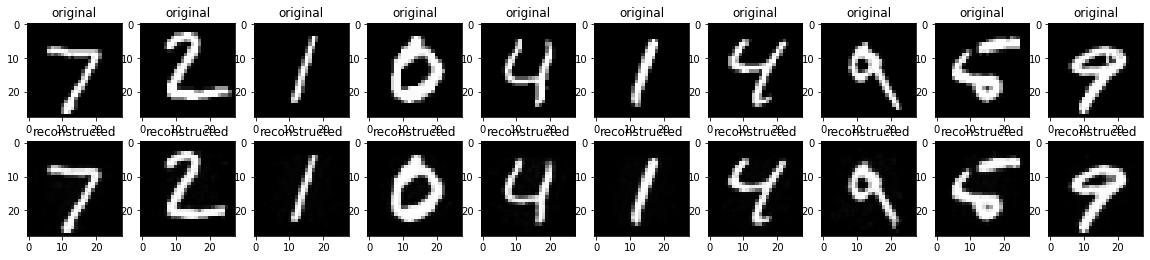

In [85]:
visualize_data(x_test, decoded_imgs)

In [97]:
#Latent space dimensionality of 2

latent_dim = 2

autoencoder_v0 = Autoencoder_v0(latent_dim)
autoencoder_v0.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder_v0.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0707 - val_loss: 0.0609
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0599 - val_loss: 0.0588
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0585 - val_loss: 0.0579
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0577 - val_loss: 0.0573
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0572 - val_loss: 0.0569
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0568 - val_loss: 0.0564
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0564 - val_loss: 0.0560
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0560 - val_loss: 0.0557
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0558 - val_loss: 0.0555
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.055

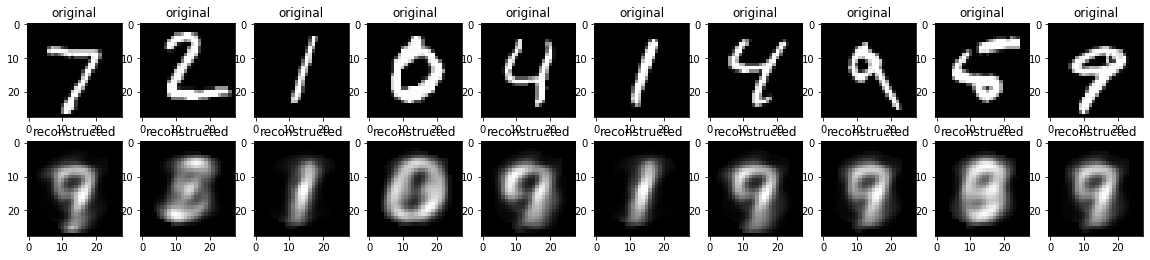

In [98]:
encoded_images = autoencoder_v0.encoder(x_test).numpy()
decoded_images = autoencoder_v0.decoder(encoded_images).numpy()

visualize_data(x_test, decoded_images)

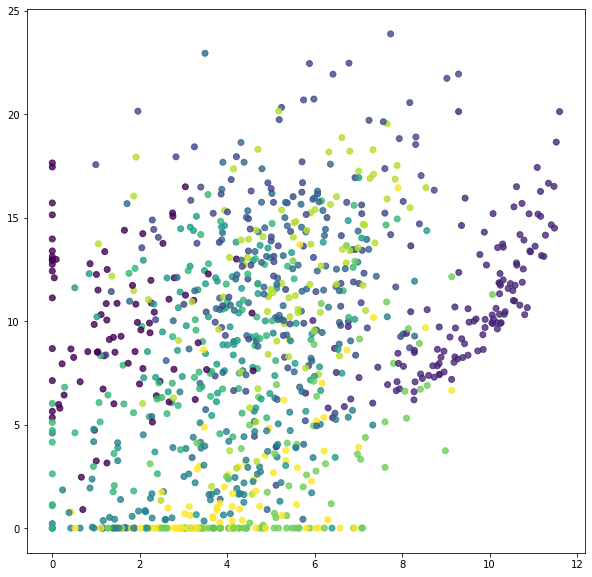

In [100]:
X = []
y = []
for i in encoded_images[:1000]:
    X.append(i[0])
    y.append(i[1])
    
plt.figure(figsize=(10, 10))
plt.scatter(X, y, alpha=0.8, c = label_test[:1000], cmap='viridis')
plt.show()

### A more complex autoencoder

- the Dense layers are used to compress the input tensor to the latent vector dimension;
- the Dropout layers help prevent overfitting;
- LeakyReLU is used to introduce non-linearities.

In [70]:
(x_train, label_train), (x_test, label_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

latent_dim = 32

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Flatten(),
          layers.Dense(512),
          layers.LeakyReLU(),
          layers.Dropout(0.5),
          layers.Dense(256),
          layers.LeakyReLU(),
          layers.Dropout(0.5),
          layers.Dense(128),
          layers.LeakyReLU(),
          layers.Dropout(0.5),
          layers.Dense(64),
          layers.LeakyReLU(),
          layers.Dropout(0.5),
          layers.Dense(latent_dim),
          layers.LeakyReLU(),
        ])
        self.decoder = tf.keras.Sequential([
          layers.Dense(64),
          layers.LeakyReLU(),
          layers.Dropout(0.5),
          layers.Dense(128),
          layers.LeakyReLU(),
          layers.Dropout(0.5),
          layers.Dense(256),
          layers.LeakyReLU(),
          layers.Dropout(0.5),
          layers.Dense(512),
          layers.LeakyReLU(),
          layers.Dropout(0.5),
          layers.Dense(784, activation='sigmoid'),
          layers.LeakyReLU(),
          layers.Dropout(0.5),
          layers.Reshape((28, 28))

        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='nadam', loss="binary_crossentropy")

In [71]:
autoencoder.fit(x_train, x_train,
                epochs=60,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/60
1875/1875 [==============================] - 29s 14ms/step - loss: 1.1933 - val_loss: 0.2746
Epoch 2/60
1875/1875 [==============================] - 31s 16ms/step - loss: 1.1361 - val_loss: 0.2656
Epoch 3/60
1875/1875 [==============================] - 30s 16ms/step - loss: 1.1319 - val_loss: 0.2598
Epoch 4/60
1875/1875 [==============================] - 27s 14ms/step - loss: 1.1297 - val_loss: 0.2619
Epoch 5/60
1875/1875 [==============================] - 28s 15ms/step - loss: 1.1273 - val_loss: 0.2547
Epoch 6/60
1875/1875 [==============================] - 33s 18ms/step - loss: 1.1266 - val_loss: 0.2606
Epoch 7/60
1875/1875 [==============================] - 27s 15ms/step - loss: 1.1261 - val_loss: 0.2565
Epoch 8/60
1875/1875 [==============================] - 28s 15ms/step - loss: 1.1253 - val_loss: 0.2514
Epoch 9/60
1875/1875 [==============================] - 27s 15ms/step - loss: 1.1254 - val_loss: 0.2554
Epoch 10/60
1875/1875 [==============================] - 27s 14m

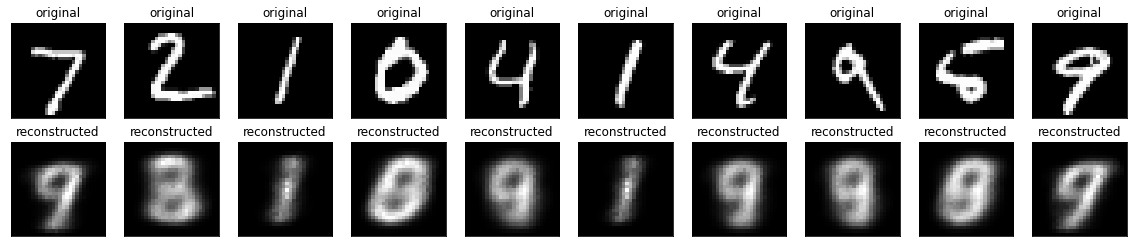

In [72]:
encoded_images_2 = autoencoder.encoder(x_test).numpy()
decoded_images_2 = autoencoder.decoder(encoded_images_2).numpy()

visualize_data(x_test, decoded_images_2)

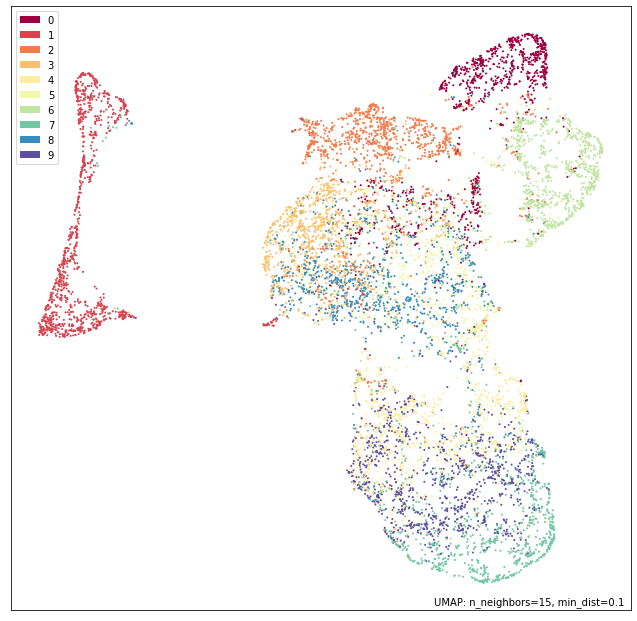

In [73]:
mapper = umap.UMAP().fit(encoded_images_2)
umap.plot.points(mapper, labels=label_test);

Epoch 1/60
1875/1875 [==============================] - 28s 14ms/step - loss: 1.1960 - val_loss: 0.2716
Epoch 2/60
1875/1875 [==============================] - 25s 13ms/step - loss: 1.1375 - val_loss: 0.2724
Epoch 3/60
1875/1875 [==============================] - 25s 13ms/step - loss: 1.1318 - val_loss: 0.2616
Epoch 4/60
1875/1875 [==============================] - 25s 13ms/step - loss: 1.1281 - val_loss: 0.2586
Epoch 5/60
1875/1875 [==============================] - 26s 14ms/step - loss: 1.1260 - val_loss: 0.2625
Epoch 6/60
1875/1875 [==============================] - 27s 14ms/step - loss: 1.1244 - val_loss: 0.2582
Epoch 7/60
1875/1875 [==============================] - 26s 14ms/step - loss: 1.1237 - val_loss: 0.2575
Epoch 8/60
1875/1875 [==============================] - 29s 15ms/step - loss: 1.1236 - val_loss: 0.2566
Epoch 9/60
1875/1875 [==============================] - 34s 18ms/step - loss: 1.1232 - val_loss: 0.2577
Epoch 10/60
1875/1875 [==============================] - 33s 17m

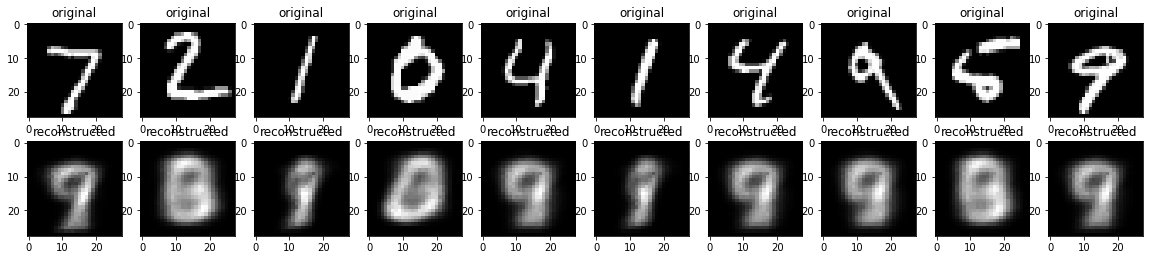

In [101]:
latent_dim = 2

autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='nadam', loss="binary_crossentropy")

autoencoder.fit(x_train, x_train,
                epochs=60,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_images_3 = autoencoder.encoder(x_test).numpy()
decoded_images_3 = autoencoder.decoder(encoded_images_3).numpy()


visualize_data(x_test, decoded_images_3)

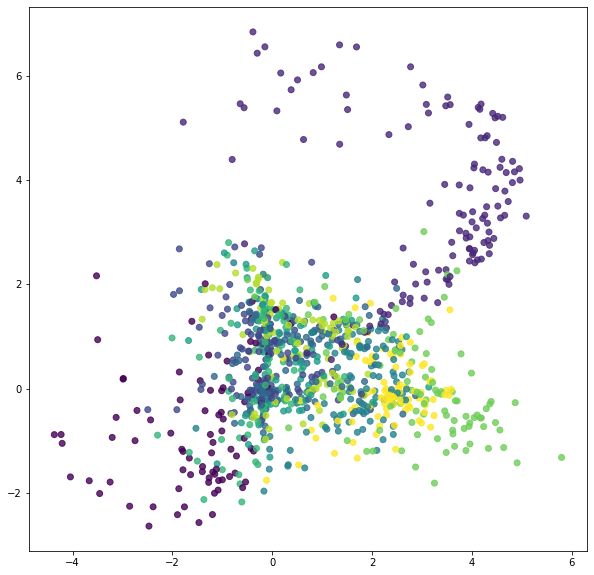

In [103]:
X = []
y = []
for i in encoded_images_3[:1000]:
    X.append(i[0])
    y.append(i[1])
    
plt.figure(figsize=(10, 10))
plt.scatter(X, y, alpha=0.8, c = label_test[:1000], cmap='viridis')
plt.show()